In [10]:
import matplotlib.pyplot as plt
import numpy as np


In [11]:
class thermalConductivityExplicit():
    def __init__(self):
        # начальные парпаметры
        self.L = 1
        self.lam = 46
        self.ro = 7800
        self.C = 460
        self.T0 = 300
        self.Tl = 600
        self.Tr = 400
        
        
        self.delta = 100
        
        self.timeOfExperience = 60
        self.tau = self.timeOfExperience / 10000
        self.h = 0.001
        
        self.T = [self.T0 for i in range(self.delta)]
        self.Tn = [self.T0 for i in range(self.delta)]
        
        self.T[0] = self.Tl
        self.T[-1] = self.Tr
        
        self.Tn[0] = self.Tl
        self.Tn[-1] = self.Tr
         
        self.coeff = self.lam * self.tau / self.ro / self.C / (self.h**2)
        
    def updateTemperatureDot(self, i):
        self.T[i] = self.Tn[i] + self.coeff * (self.Tn[i+1] - 2*self.Tn[i] + self.Tn[i-1])
    
    def updateTemperatureArray(self):
        for i in range(1, len(self.T)-1, 1):
            self.updateTemperatureDot(i)
        self.Tn = self.T.copy()

        
    def conductExperiment(self):
        t = 0
        while t <= self.timeOfExperience:
                self.updateTemperatureArray()
                t+=self.tau
    
    def getT(self):
        return self.T

ExperimentExp = thermalConductivityExplicit()

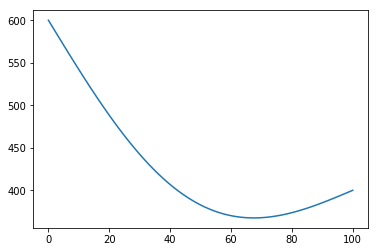

In [12]:
ExperimentExp.conductExperiment()
x = np.linspace(0, 100, 100)
y = ExperimentExp.getT()
plt.plot(x, y)

In [16]:
class thermalConductivityImplicit():
    def __init__(self):
        # начальные парпаметры
        self.L = 0.1
        self.lam = 46
        self.ro = 7800
        self.C = 460
        self.T0 = 300
        self.Tl = 600
        self.Tr = 400
        
        
        self.delta = 100
        
        self.timeOfExperience = 60
        self.tau = self.timeOfExperience / self.delta
        self.h = self.L / self.delta
        
        self.T = [self.T0 for i in range(self.delta)]
        self.T[0] = self.Tl
        self.T[-1] = self.Tr
        
        self.alpha = [0 for i in range(self.delta)]
        self.betta = [self.T[0] for i in range(self.delta)]  
        
    def updateAlphaBetta(self, i):
        Ai = Ci = self.lam / self.h**2
        Bi = 2 * Ai + self.C * self.ro / self.tau
        
        Fi = - self.ro * self.C / self.tau * self.T[i]
        
        self.alpha[i] = Ai / (Bi - self.alpha[i - 1] * Ci)
        self.betta[i] = (Ci * self.betta[i - 1] - Fi) / (Bi - self.alpha[i - 1] * Ci)
        
    def updateTemperatureDot(self, i):
        self.T[i] = self.alpha[i] * self.T[i + 1] + self.betta[i]
        
    
    def updateTemperatureArray(self):
        self.alpha = [0 for i in range(self.delta)]
        self.betta = [self.T[0] for i in range(self.delta)]
        
        for i in range(1, len(self.T)-1, 1):
            self.updateAlphaBetta(i)
        
        for i in range(len(self.T)-2, 0, -1):
                self.updateTemperatureDot(i)
       
    def conductExperiment(self):
        t = 0
        while t <= self.timeOfExperience:
                self.updateTemperatureArray()
                t+=self.tau
    
    def getT(self):
        return self.T

ExperimentImp = thermalConductivityImplicit()

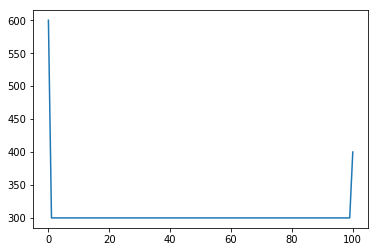

In [17]:
x = np.linspace(0, 100, 100)
y = ExperimentImp.getT()
plt.plot(x, y)

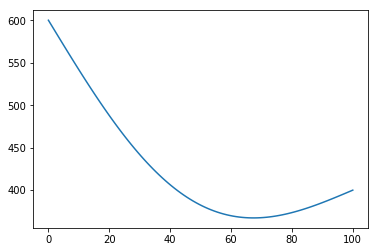

In [18]:
ExperimentImp.conductExperiment()
x = np.linspace(0, 100, 100)
y = ExperimentImp.getT()
plt.plot(x, y)